In [ ]:
from flash_ansr import SkeletonPool, get_path
import os
import matplotlib.pyplot as plt
import numpy as np

In [53]:
test_sets = ['feynman', 'soose_nc', 'nguyen', 'hard_set']
column_names = {
    'feynman': 'Feynman',
    'soose_nc': 'S.-NC',
    'nguyen': 'Nguyen',
    'hard_set': 'Hard'
}

In [54]:
test_set_paths = {test_set: os.path.join(get_path('data', 'neural-symbolic-regression-data', 'test_set', test_set), 'skeleton_pool') for test_set in test_sets}

In [55]:
pools = {test_set: SkeletonPool.load(test_set_paths[test_set])[1] for test_set in test_sets}

Compiling Skeletons: 100%|██████████| 4999/4999 [00:00<00:00, 31184.67it/s]


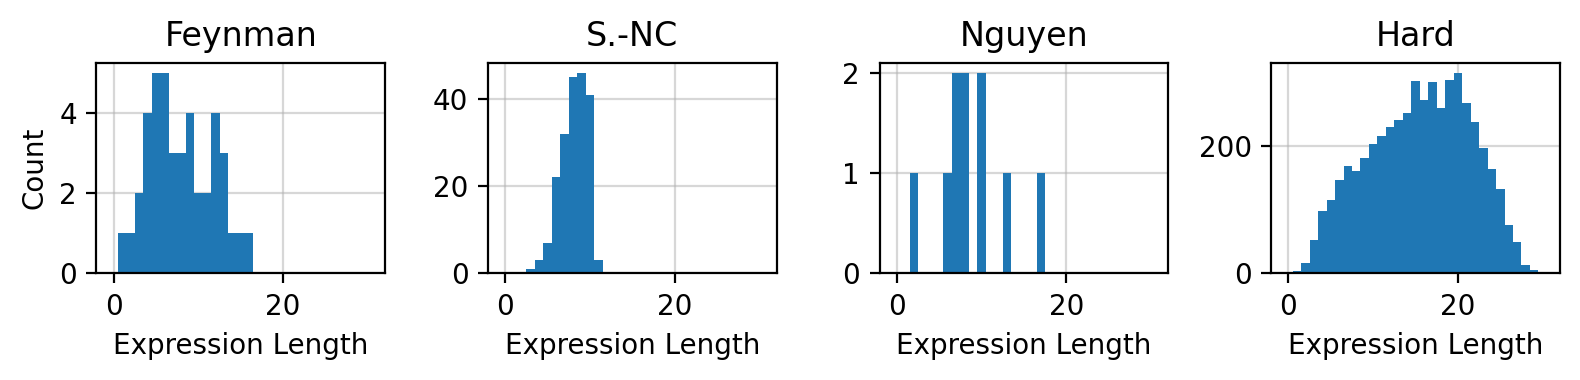

In [60]:
fig, axes = plt.subplots(1, 4, figsize=(8,2), dpi=200)

min_length = 0
max_length = max(max(len(s) for s in pool.skeletons) for pool in pools.values())

for i, (ax, pool, test_set) in enumerate(zip(axes.flat, pools.values(), test_sets)):
    pool = pools[test_set]
    ax.hist([len(s) for s in pool.skeletons], bins=np.arange(min_length, max_length + 1) - 0.5, zorder=2)
    ax.set_title(column_names[test_set])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Expression Length')
    if i == 0:
        ax.set_ylabel('Count')

fig.tight_layout()